In this project, I use the SMS Spam Collection Data set which contains 5000 SMS phone messages.

The codes is followed by a description.

In [38]:
import nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\julie\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


Used the nltk.download_shell() to download the stopwords package.

In [39]:
import pandas as pd
import os
pd.set_option('display.max_columns',20)
os.chdir("C:\\users\julie\pJupyterProjects\Data Science")

messages = [line.rstrip() for line in open('SMSSpamCollection')]         
print(len(messages))

5574


Opens file called 'SMSSpamCollection' in a variable called messages. Also removes all whitespace on the right side of the messages.

In [40]:
for a,b in enumerate(messages[:10]):
    print(a,b)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In just the first 10 messages, there are many SPAMS.

In [41]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])
print(messages.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


Modifies the variable messages in to a DataFrame, where what separates the columns are the tabs in those messages. names= 
creates the name for these columns (we know that there are 2). Index is automatically created.

In [42]:
print(messages.groupby('label').describe())

      message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4


We can groupby label to analyse the differences between messages from Ham and Spam. 

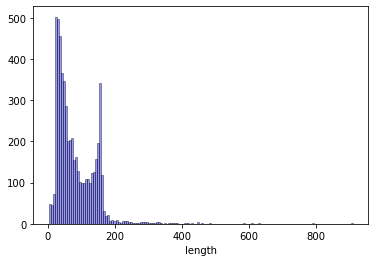

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

messages['length']=messages['message'].apply(len)
sns.distplot(messages['length'],color='b',bins=150,hist_kws=dict(edgecolor="k"),kde=False)
plt.show()

Created another column that contains the length of each messages.

The figures hows a somewhat bimodal distribution where for very short messages, the count is high, and for messages that are more or less lengthy for a message (180 words), the count is also high. The graph also shows that there are some really long text messages.

            length
count  5572.000000
mean     80.489950
std      59.942907
min       2.000000
25%      36.000000
50%      62.000000
75%     122.000000
max     910.000000
     label                                            message  length
1085   ham  For me the love should start with attraction.i...     910
For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love wil

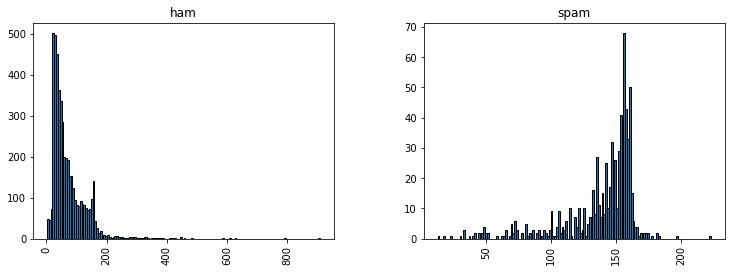

In [44]:
print(messages.describe())
print(messages[messages['length']==910])

print(messages[messages['length']==910]['message'].iloc[0])

messages.hist(column='length',by='label',bins=150 ,figsize=(12,4),ec='black')
plt.show()

The describe() method shows that longest message is 910 in length and that this message is a love letter.

The figures show the length of each message by its label in different columns.
Figure shows that the outliers (very long messages) are from ham.
It also shows that on average, spam messages are longer.

In [45]:
import string  
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [46]:
from nltk.corpus import stopwords
asddsa=stopwords.words("english")

def a(g):
    k = [char for char in g if char not in string.punctuation]
    k = ''.join(k)
    return [l for l in k.split() if l.lower() not in asddsa]

stopwords.words("english") contains very common words that don't contain any distinguishing features.

The a(g) function:
    1. Removes all punctuation
    2. Removes all stopwords
    3. Returns a list of the cleaned text

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

print(messages['message'].head().apply(a))

bow_transformer = CountVectorizer(analyzer=a).fit(messages['message'])        
print(len(bow_transformer.vocabulary_))       

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object
11425


Prints out the head of the messages DataFrame with the applied function.

The code also creates a very large matrix. All the rows are words, and all the columns are every single messages.
THere are 11,425 vocabularies. 

In [52]:
ha = messages['message'][3]
bow4 = bow_transformer.transform([ha])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


The message at the third index contains 7 important words.

In [54]:
print(bow4.shape)

(1, 11425)


The shape() method indicates that there is 1 column and 11426 rows (index 0 = row 1).

In [55]:
po = bow_transformer.transform(messages['message'])
print(po.shape)

(5572, 11425)


Applies to all the transform on all messages

In [56]:
print(po.nnz)

50548


Prints the number of non-zero occurences

In [57]:
sparsity = (100.0 * po.nnz / (po.shape[0] * po.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07940295412668218


Compares the number of non zero messages vs the total number of messages (how much zeroes there are in the matrix).

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

az = TfidfTransformer().fit(po)
ac = az.transform(bow4)
azc = az.transform(po)
print(ac)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


Prints the inverse document frequency and term frequency relationship for the particular message.
The numbers are a weight values for each of these words.

In [67]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(azc,messages['label'])
print(spam_detect_model.predict(ac)[0])


all_pred = spam_detect_model.predict(azc)
print(all_pred)

ham
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


This model predicts Ham vs SPAM classification. 

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)
 
pipeline = Pipeline([('bows',CountVectorizer(analyzer=a)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())])           

pipeline.fit(msg_train,label_train)      
predictions = pipeline.predict(msg_test)

print(classification_report(label_test,predictions))
print(confusion_matrix(label_test,predictions))


              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1444
        spam       1.00      0.69      0.82       228

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672

[[1444    0]
 [  70  158]]


The classification report indicates that the model

We can summarize all the steps into a pipeline so that we don't have to constantly repeat everything for different sets of data.
We can also use a RandomForest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('bows',CountVectorizer(analyzer=a)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',RandomForestClassifier())])            
pipeline.fit(msg_train,label_train)      
predictions = pipeline.predict(msg_test)
print(classification_report(label_test,predictions))
print(confusion_matrix(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1444
        spam       1.00      0.82      0.90       228

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

[[1444    0]
 [  41  187]]


In [ ]:
The random forest classifier performed slightly better than the MultinomialNB.